In [1]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import math
from prophet import Prophet
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Thesis/Datasets

Mounted at /content/drive
/content/drive/MyDrive/Thesis/Datasets


In [4]:
data = pd.read_csv('time_series_data.csv')

# Convert date column to datetime format
data['ds'] = pd.to_datetime(data['date'])

# Rename sales column as y
data.rename(columns={'sales': 'y'}, inplace=True)

In [5]:
p = 80 # training percentage
m = math.ceil(len(data) * p / 100)
print(m)
print(len(data) - m)

508
126


In [6]:
# Train-test split
train_data = data[:m]
test_data = data[m:]
print(len(train_data))
print(len(test_data))

508
126


In [7]:
# Initialize and fit model
model = Prophet()
model.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps7bb24ac/q87cml49.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps7bb24ac/w7uuq4zx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91884', 'data', 'file=/tmp/tmps7bb24ac/q87cml49.json', 'init=/tmp/tmps7bb24ac/w7uuq4zx.json', 'output', 'file=/tmp/tmps7bb24ac/prophet_modeldvmyje91/prophet_model-20230513143717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
# Generate forecast
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

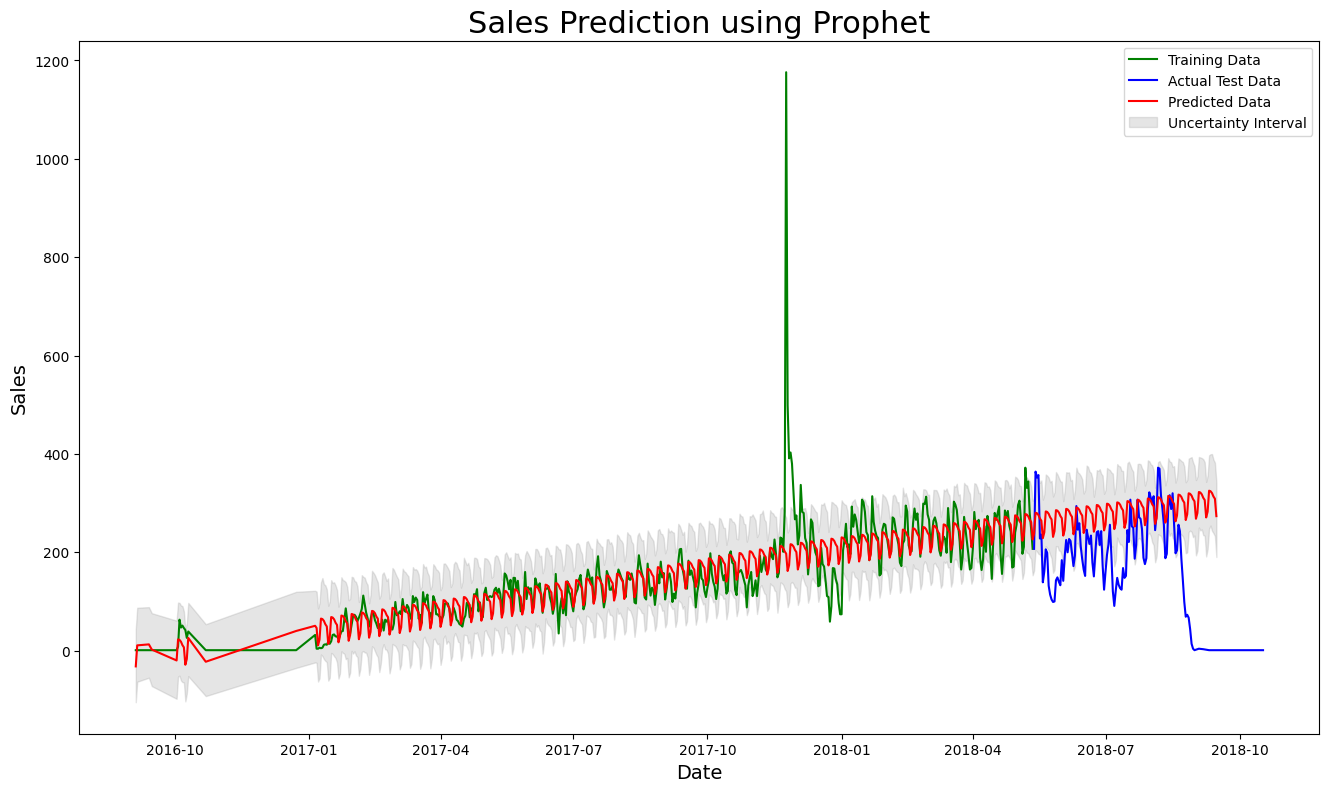

In [9]:
# Plot forecast
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(train_data['ds'], train_data['y'], color='green', label='Training Data')
ax.plot(test_data['ds'], test_data['y'], color='blue', label='Actual Test Data')
ax.plot(forecast['ds'], forecast['yhat'], color='red', label='Predicted Data')

# Plot the uncertainty interval in gray
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')

plt.title('Sales Prediction using Prophet', fontsize=22)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend()
plt.show()